**Poojitha Konduparti**

##Deep Learning with CNNs for Computer Vision

The field of Deep Learning has materialized  a lot over the past few decades due to efficiently tackling massive datasets and making computer systems capable enough to solve computational problems.CNN is one of the most deployed deep learning neural networks.

What is CNN?
In the field of deep learning, convolutional neural network (CNN) is among the class of deep neural networks, which was being mostly deployed in the field of analyzing/image recognition.Convolutional Neural uses a very special kind of method which is being known as Convolution.

The mathematical definition of convolution is a mathematical operation being applied on the two functions that give output in a form of a third function that shows how the shape of one function is being influenced, modified by the other function.

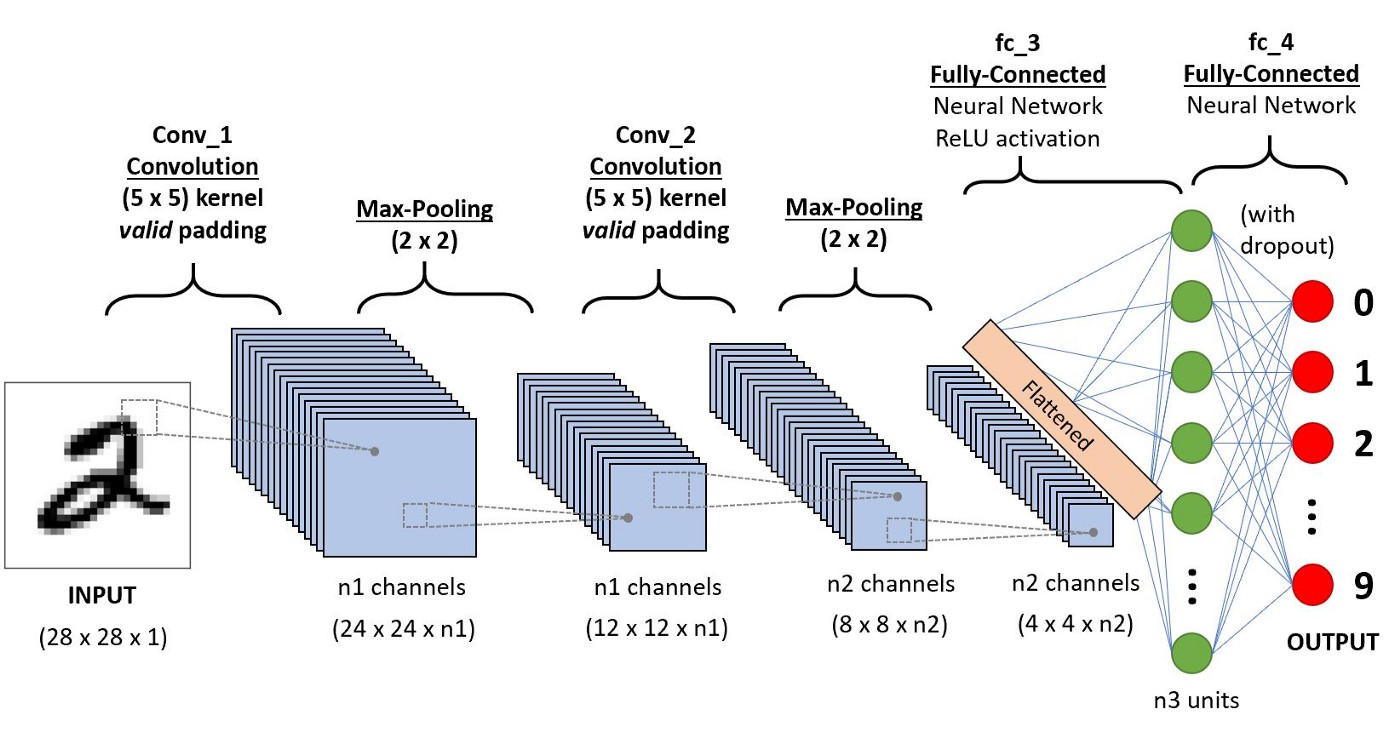

##Importing necessary libraries

In [1]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Conv2D
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score
from google.colab import drive


##Reading and Visualizing the Dataset

In [2]:
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('drive/My Drive/Colab Notebooks/TMNIST/94_character_TMNIST 3.csv')

Mounted at /content/drive


In [3]:
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(274093, 786)

In [5]:
#Dataset Characteristics
print(f"The Shape of the Dataset is: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

The Shape of the Dataset is: (274093, 786)
Number of Samples: 274093
Number of Features: 786


In [6]:
#size of dataframe
print('Total number of rows in datafame',df.shape[0])
print('Total number of columns in datafame',df.shape[1])
#getting total number of unique classes present in the dataframe
num_classes=df['labels'].nunique()
print('Total number of classes are ',num_classes)
#printing all the unique classes
print(df['labels'].unique())
#getting the total number of font types present in the data
num_font=df['names'].nunique()
print('The total number of different type of fonts present are -',num_font)

Total number of rows in datafame 274093
Total number of columns in datafame 786
Total number of classes are  94
['6' 'D' 'f' '/' 'F' 'x' 'J' '8' 'H' 'k' '@' '1' '=' 'g' ')' '2' 'd' '^'
 '3' 't' '#' '.' '4' 'o' '"' 'y' 'A' 'u' 'G' '-' 'm' 'W' '&' 'c' '9' 'N'
 ']' 'P' 'X' '|' '}' 'h' '7' 'j' '5' '>' '?' 'b' '*' 'w' 'l' '0' '$' 'I'
 'Y' '%' ':' 'T' 'K' 'E' '<' 'V' '{' 'M' 'S' 'a' 'i' 'r' "'" 'p' ';' '['
 '+' 'e' 'U' '(' 's' '~' ',' 'C' 'q' '_' 'n' 'B' 'z' 'v' 'O' 'R' '`' 'Z'
 'Q' 'L' '!' '\\']
The total number of different type of fonts present are - 2990


In [7]:
num_unique_chars = len(df.labels.unique())
print(f"Number of unique character present in the Dataset: {num_unique_chars}")

Number of unique character present in the Dataset: 94


In [8]:
#Drop redundant coloums (names and labels), retain only pixel values
x = df.drop(columns=['names','labels']).values
y = df[['labels']].values

In [9]:
#Convert NumPy array to Pandas Dataframe for ease of processing downstream and triaging
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

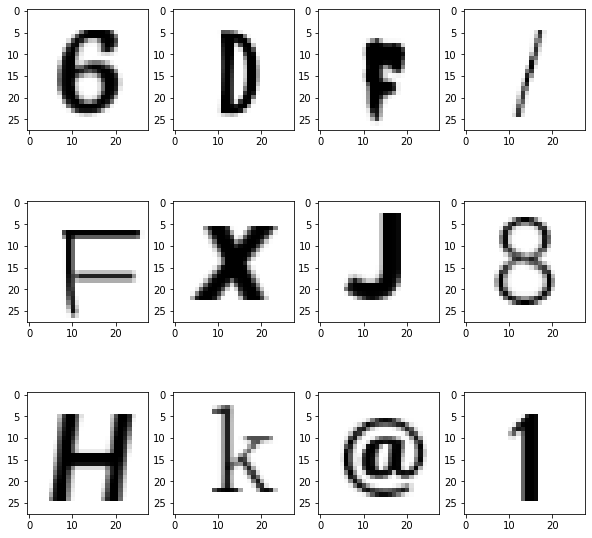

In [10]:
# sample reshaped characters of the dataset
x_images = x.reshape(-1,28,28)
fig,axs = plt.subplots(3,4,figsize=(10,10))
for i in range(12):
    r=i//4
    c=i%4
    axs[r][c].imshow(x_images[i], cmap="Greys")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)


In [12]:
#Shape of training Data
print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')


X:Train, Test data shape:(219274, 784),(54819, 784)
Y:Train, Test data shape:(219274, 1),(54819, 1)


In [13]:
#the pixel values are from 0-255, normalizing the dataset for neural network models, converting them to values between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [14]:
#encoding the y values
char_enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded= char_enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  char_enc.transform(y_test.values.reshape(-1,1))

In [15]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

## Part A- TMNIST 94 Alphabet Dataset Baseline Model

Activation Function: Softmax

Cost Function: Categorical Cross Entropy

Epochs: 20

Gradient Estimation: Adam

Network Initialization: Glorot Uniform



In [16]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Fitting the basic model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 10s - loss: 0.8043 - accuracy: 0.7875 - val_loss: 0.4927 - val_accuracy: 0.8515 - 10s/epoch - 6ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.4366 - accuracy: 0.8652 - val_loss: 0.4323 - val_accuracy: 0.8670 - 6s/epoch - 3ms/step
Epoch 3/20
1714/1714 - 6s - loss: 0.3696 - accuracy: 0.8809 - val_loss: 0.3797 - val_accuracy: 0.8791 - 6s/epoch - 3ms/step
Epoch 4/20
1714/1714 - 6s - loss: 0.3251 - accuracy: 0.8924 - val_loss: 0.3609 - val_accuracy: 0.8879 - 6s/epoch - 3ms/step
Epoch 5/20
1714/1714 - 6s - loss: 0.2923 - accuracy: 0.9022 - val_loss: 0.3491 - val_accuracy: 0.8909 - 6s/epoch - 3ms/step
Epoch 6/20
1714/1714 - 6s - loss: 0.2665 - accuracy: 0.9090 - val_loss: 0.3333 - val_accuracy: 0.8961 - 6s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 6s - loss: 0.2429 - accuracy: 0.9157 - val_loss: 0.3278 - val_accuracy: 0.8978 - 6s/epoch - 3ms/step
Epoch 8/20
1714/1714 - 5s - loss: 0.2272 - accuracy: 0.9207 - val_loss: 0.3326 - val_accuracy: 0.9010 - 5s/epoch - 3ms/step
Epoch 

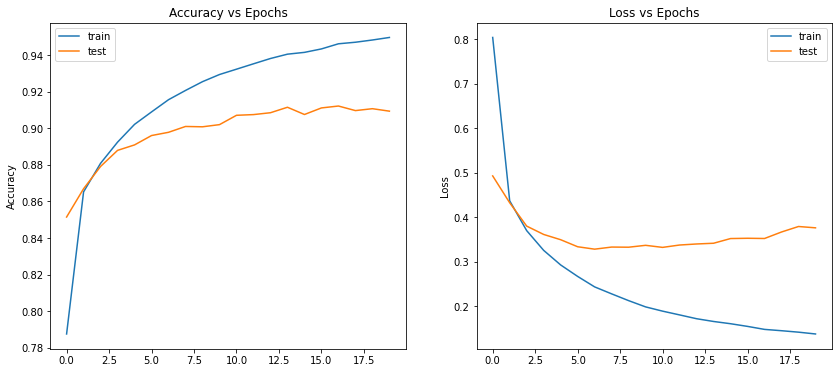

In [18]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


##Part B - Activation Function

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

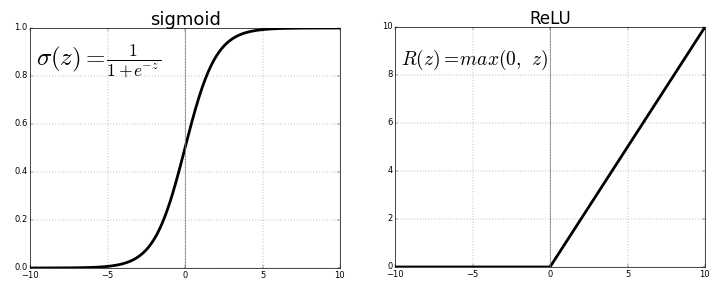
Here, we are changing the activation function in the baseline model from relu to ELU and Leaky Relu and observe the result of this experiment

Using ELU
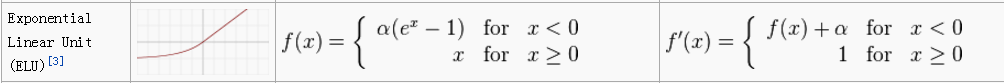

In [19]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='elu'))
model.add(Dense(128,activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 7s - loss: 0.7764 - accuracy: 0.7933 - val_loss: 0.5241 - val_accuracy: 0.8478 - 7s/epoch - 4ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.4559 - accuracy: 0.8620 - val_loss: 0.4286 - val_accuracy: 0.8696 - 6s/epoch - 3ms/step
Epoch 3/20
1714/1714 - 5s - loss: 0.3866 - accuracy: 0.8791 - val_loss: 0.3854 - val_accuracy: 0.8840 - 5s/epoch - 3ms/step
Epoch 4/20
1714/1714 - 6s - loss: 0.3451 - accuracy: 0.8901 - val_loss: 0.3711 - val_accuracy: 0.8866 - 6s/epoch - 3ms/step
Epoch 5/20
1714/1714 - 6s - loss: 0.3128 - accuracy: 0.8989 - val_loss: 0.3494 - val_accuracy: 0.8918 - 6s/epoch - 3ms/step
Epoch 6/20
1714/1714 - 6s - loss: 0.2878 - accuracy: 0.9055 - val_loss: 0.3329 - val_accuracy: 0.8988 - 6s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 7s - loss: 0.2667 - accuracy: 0.9117 - val_loss: 0.3199 - val_accuracy: 0.9027 - 7s/epoch - 4ms/step
Epoch 8/20
1714/1714 - 6s - loss: 0.2502 - accuracy: 0.9164 - val_loss: 0.3414 - val_accuracy: 0.8979 - 6s/epoch - 3ms/step
Epoch 9/

We can conclude that the accuracy of a model using relu vs elu is slightly different with relu being the higher accuracy and lower loss giving activation function in this scenario.



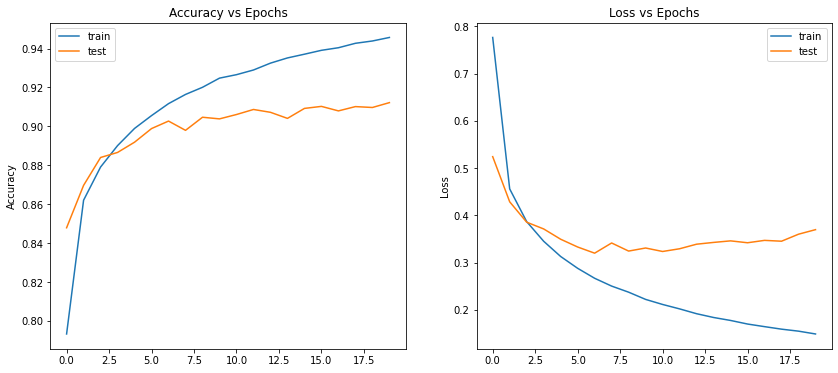

In [21]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


Leaky RelU is an attempt to solve the dying ReLU problem

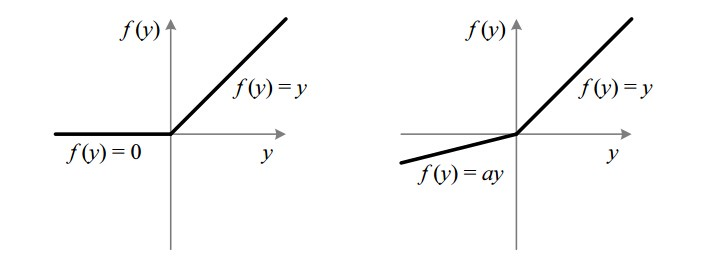


The leak helps to increase the range of the ReLU function.Therefore the range of the Leaky ReLU is (-infinity to infinity).

In [18]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(128,activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 9s - loss: 0.7958 - accuracy: 0.7903 - val_loss: 0.4945 - val_accuracy: 0.8515 - 9s/epoch - 6ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.4340 - accuracy: 0.8662 - val_loss: 0.4221 - val_accuracy: 0.8663 - 6s/epoch - 4ms/step
Epoch 3/20
1714/1714 - 6s - loss: 0.3649 - accuracy: 0.8824 - val_loss: 0.3850 - val_accuracy: 0.8767 - 6s/epoch - 4ms/step
Epoch 4/20
1714/1714 - 6s - loss: 0.3230 - accuracy: 0.8933 - val_loss: 0.3645 - val_accuracy: 0.8849 - 6s/epoch - 4ms/step
Epoch 5/20
1714/1714 - 7s - loss: 0.2907 - accuracy: 0.9023 - val_loss: 0.3354 - val_accuracy: 0.8934 - 7s/epoch - 4ms/step
Epoch 6/20
1714/1714 - 5s - loss: 0.2663 - accuracy: 0.9085 - val_loss: 0.3360 - val_accuracy: 0.8957 - 5s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 6s - loss: 0.2442 - accuracy: 0.9156 - val_loss: 0.3305 - val_accuracy: 0.9001 - 6s/epoch - 3ms/step
Epoch 8/20
1714/1714 - 6s - loss: 0.2266 - accuracy: 0.9210 - val_loss: 0.3366 - val_accuracy: 0.8955 - 6s/epoch - 3ms/step
Epoch 9/

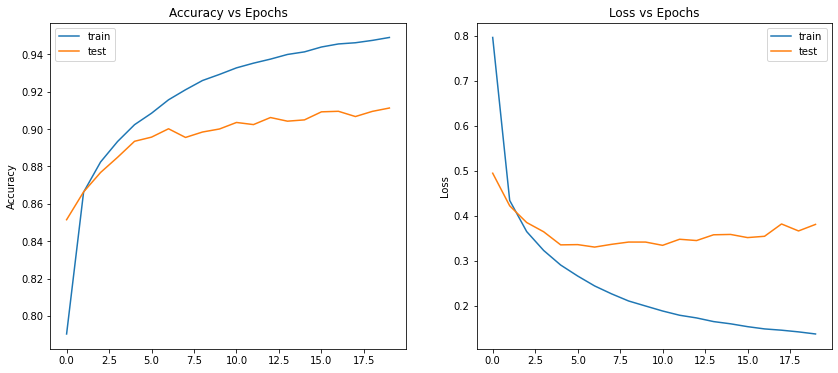

In [20]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


## Part C - Cost Function

Cross entropy loss is used in classification tasks where we are trying to minimize the probability of a negative class by maximizing an expected value of some function on our training data, also called as “loss function”. Simply speaking, it is used to measure the difference between two probabilities that a model assigns to classes.

Mean squared error (MSE) loss is calculated by taking the difference between `y` and our prediction, then square those values. We take these new numbers (square them), add all of that together to get a final value, finally divide this number by y again. This will be our final result.

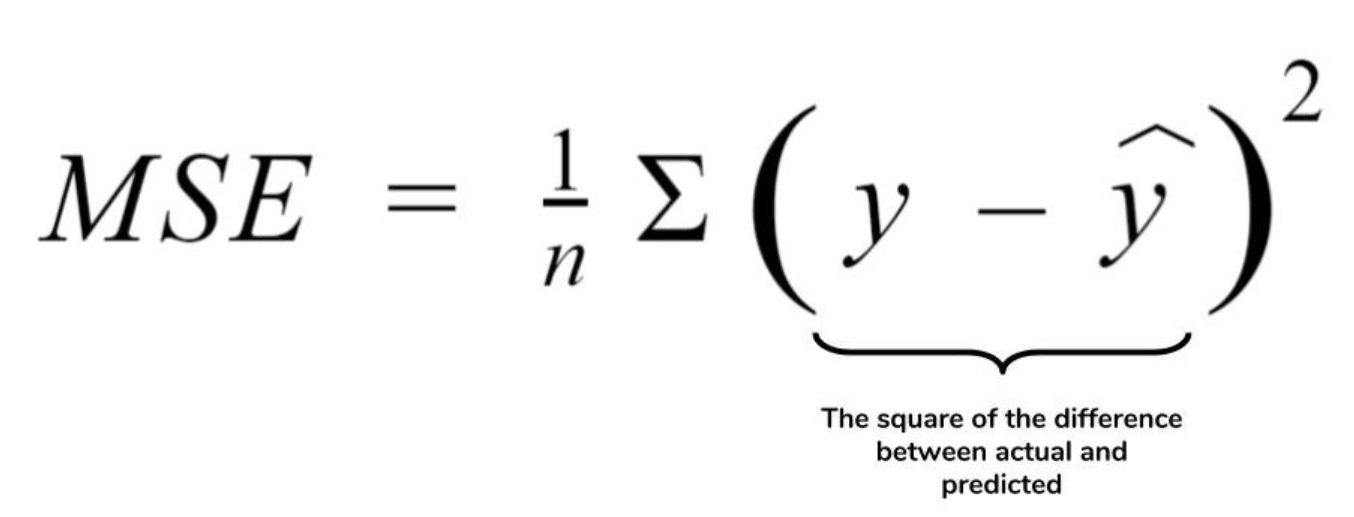

In this section, we will experiment with a cost functions other than categorical crossentropy like Quadratic cost (mean-square error)

In [21]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 7s - loss: 0.0043 - accuracy: 0.6923 - val_loss: 0.0029 - val_accuracy: 0.7959 - 7s/epoch - 4ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.0024 - accuracy: 0.8411 - val_loss: 0.0022 - val_accuracy: 0.8563 - 6s/epoch - 4ms/step
Epoch 3/20
1714/1714 - 5s - loss: 0.0019 - accuracy: 0.8744 - val_loss: 0.0019 - val_accuracy: 0.8752 - 5s/epoch - 3ms/step
Epoch 4/20
1714/1714 - 5s - loss: 0.0017 - accuracy: 0.8890 - val_loss: 0.0018 - val_accuracy: 0.8809 - 5s/epoch - 3ms/step
Epoch 5/20
1714/1714 - 6s - loss: 0.0016 - accuracy: 0.8981 - val_loss: 0.0017 - val_accuracy: 0.8861 - 6s/epoch - 3ms/step
Epoch 6/20
1714/1714 - 6s - loss: 0.0015 - accuracy: 0.9041 - val_loss: 0.0017 - val_accuracy: 0.8927 - 6s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 7s - loss: 0.0014 - accuracy: 0.9090 - val_loss: 0.0015 - val_accuracy: 0.9001 - 7s/epoch - 4ms/step
Epoch 8/20
1714/1714 - 6s - loss: 0.0013 - accuracy: 0.9137 - val_loss: 0.0016 - val_accuracy: 0.8984 - 6s/epoch - 3ms/step
Epoch 9/

Using MSE has not improved our accuracy but has cut down our loss by a huge margin.


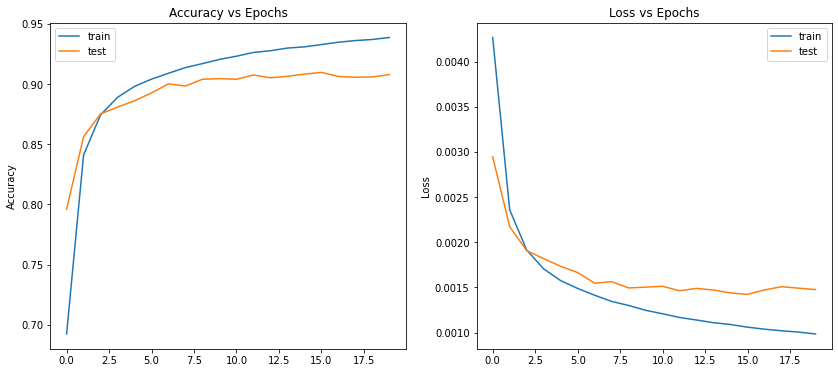

In [23]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


## Part D - Epochs


In our baseline model, we trained the dataset over 20 epochs and examined the accuracy and loss. Now, we will increase the number of epochs to observe the results.

Here, we have doubled the no. of epochs from our baseline i.e. 40 epochs

In [16]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


We can see below that this model gives us better accuracy and minimizes the cost function in comparison to our baseline model as the longer you train the data for, the better the chances are for improved accuracy

In [17]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=40, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/40
1714/1714 - 10s - loss: 0.8190 - accuracy: 0.7850 - val_loss: 0.5130 - val_accuracy: 0.8459 - 10s/epoch - 6ms/step
Epoch 2/40
1714/1714 - 6s - loss: 0.4392 - accuracy: 0.8653 - val_loss: 0.4236 - val_accuracy: 0.8680 - 6s/epoch - 4ms/step
Epoch 3/40
1714/1714 - 6s - loss: 0.3706 - accuracy: 0.8816 - val_loss: 0.3859 - val_accuracy: 0.8800 - 6s/epoch - 3ms/step
Epoch 4/40
1714/1714 - 6s - loss: 0.3256 - accuracy: 0.8934 - val_loss: 0.3641 - val_accuracy: 0.8845 - 6s/epoch - 3ms/step
Epoch 5/40
1714/1714 - 6s - loss: 0.2942 - accuracy: 0.9028 - val_loss: 0.3439 - val_accuracy: 0.8918 - 6s/epoch - 3ms/step
Epoch 6/40
1714/1714 - 6s - loss: 0.2679 - accuracy: 0.9091 - val_loss: 0.3263 - val_accuracy: 0.8994 - 6s/epoch - 3ms/step
Epoch 7/40
1714/1714 - 6s - loss: 0.2461 - accuracy: 0.9153 - val_loss: 0.3290 - val_accuracy: 0.8966 - 6s/epoch - 3ms/step
Epoch 8/40
1714/1714 - 6s - loss: 0.2303 - accuracy: 0.9204 - val_loss: 0.3423 - val_accuracy: 0.8962 - 6s/epoch - 3ms/step
Epoch 

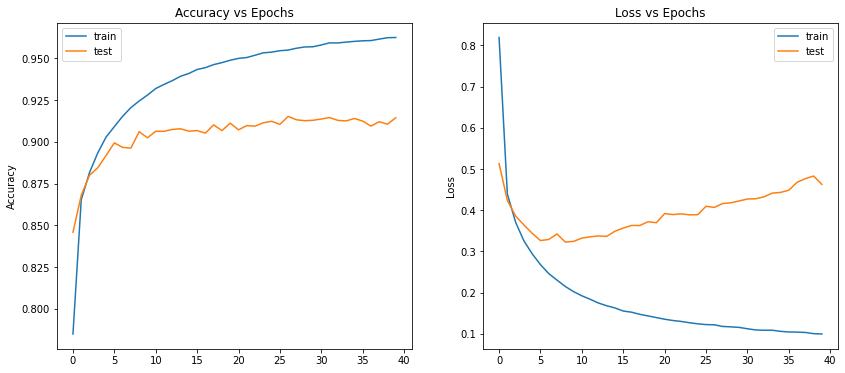

In [18]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(40)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


In [19]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


Here, we try to work with half the number of epochs as compared to our baseline model and we can see that the accuracy after 10 epochs is only 0.9290 and the loss is 0.2012 both of which are proved to have been better when run for more epochs


In [20]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/10
1714/1714 - 7s - loss: 0.8045 - accuracy: 0.7876 - val_loss: 0.5222 - val_accuracy: 0.8441 - 7s/epoch - 4ms/step
Epoch 2/10
1714/1714 - 6s - loss: 0.4379 - accuracy: 0.8661 - val_loss: 0.4293 - val_accuracy: 0.8660 - 6s/epoch - 3ms/step
Epoch 3/10
1714/1714 - 6s - loss: 0.3709 - accuracy: 0.8815 - val_loss: 0.3902 - val_accuracy: 0.8797 - 6s/epoch - 3ms/step
Epoch 4/10
1714/1714 - 6s - loss: 0.3269 - accuracy: 0.8926 - val_loss: 0.3604 - val_accuracy: 0.8879 - 6s/epoch - 3ms/step
Epoch 5/10
1714/1714 - 6s - loss: 0.2942 - accuracy: 0.9020 - val_loss: 0.3434 - val_accuracy: 0.8920 - 6s/epoch - 3ms/step
Epoch 6/10
1714/1714 - 6s - loss: 0.2675 - accuracy: 0.9098 - val_loss: 0.3351 - val_accuracy: 0.8963 - 6s/epoch - 3ms/step
Epoch 7/10
1714/1714 - 5s - loss: 0.2461 - accuracy: 0.9156 - val_loss: 0.3334 - val_accuracy: 0.8986 - 5s/epoch - 3ms/step
Epoch 8/10
1714/1714 - 6s - loss: 0.2284 - accuracy: 0.9208 - val_loss: 0.3312 - val_accuracy: 0.8985 - 6s/epoch - 3ms/step
Epoch 9/

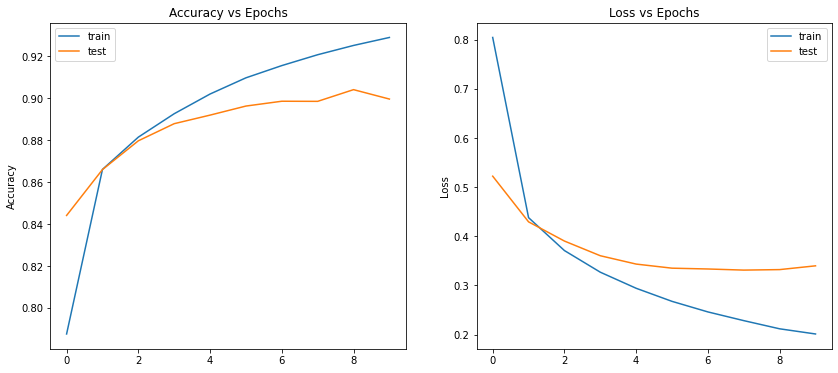

In [21]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(10)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


## Part E - Gradient Estimation


RMS prop is one of the popular optimizers among deep learning enthusiasts. This is maybe because it hasn’t been published but still very well know in the community. RMS prop is ideally an extension of the work RPPROP. RPPROP resolves the problem of varying gradients.

AdaDelta can be seen as a more robust version of AdaGrad optimizer. It is based upon adaptive learning and is designed to deal with significant drawbacks of AdaGrad and RMS prop optimizer. The main problem with the above two optimizers is that the initial learning rate must be defined manually.

The creators of the Adam optimization algorithm know the benefits of AdaGrad and RMSProp algorithms, which are also extensions of the stochastic gradient descent algorithms. Hence the Adam optimizers inherit the features of both Adagrad and RMS prop algorithms. In adam, instead of adapting learning rates based upon the first moment(mean) as in RMS Prop, it also uses the second moment of the gradients.

In this section, we will be experimenting with RMSProp and AdaDelta

In [22]:
from keras.optimizers import RMSprop
from keras.optimizers import Adadelta

In [23]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = RMSprop()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 8s - loss: 0.8220 - accuracy: 0.7824 - val_loss: 0.5312 - val_accuracy: 0.8401 - 8s/epoch - 4ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.4320 - accuracy: 0.8677 - val_loss: 0.4608 - val_accuracy: 0.8555 - 6s/epoch - 4ms/step
Epoch 3/20
1714/1714 - 6s - loss: 0.3654 - accuracy: 0.8831 - val_loss: 0.4547 - val_accuracy: 0.8643 - 6s/epoch - 4ms/step
Epoch 4/20
1714/1714 - 7s - loss: 0.3279 - accuracy: 0.8939 - val_loss: 0.3970 - val_accuracy: 0.8805 - 7s/epoch - 4ms/step
Epoch 5/20
1714/1714 - 6s - loss: 0.3004 - accuracy: 0.9022 - val_loss: 0.3827 - val_accuracy: 0.8854 - 6s/epoch - 4ms/step
Epoch 6/20
1714/1714 - 6s - loss: 0.2788 - accuracy: 0.9083 - val_loss: 0.3558 - val_accuracy: 0.8951 - 6s/epoch - 4ms/step
Epoch 7/20
1714/1714 - 7s - loss: 0.2626 - accuracy: 0.9128 - val_loss: 0.3881 - val_accuracy: 0.8895 - 7s/epoch - 4ms/step
Epoch 8/20
1714/1714 - 6s - loss: 0.2495 - accuracy: 0.9173 - val_loss: 0.3798 - val_accuracy: 0.8977 - 6s/epoch - 4ms/step
Epoch 9/

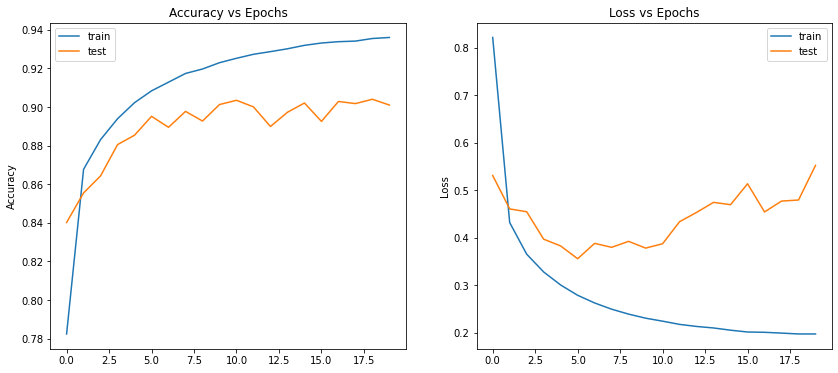

In [25]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


Using AdaDelta gives us an accuracy of 0.2785 which is a very poor performance

In [26]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adadelta()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 7s - loss: 4.5327 - accuracy: 0.0124 - val_loss: 4.5143 - val_accuracy: 0.0171 - 7s/epoch - 4ms/step
Epoch 2/20
1714/1714 - 6s - loss: 4.4968 - accuracy: 0.0230 - val_loss: 4.4770 - val_accuracy: 0.0320 - 6s/epoch - 3ms/step
Epoch 3/20
1714/1714 - 6s - loss: 4.4566 - accuracy: 0.0381 - val_loss: 4.4334 - val_accuracy: 0.0437 - 6s/epoch - 3ms/step
Epoch 4/20
1714/1714 - 6s - loss: 4.4097 - accuracy: 0.0477 - val_loss: 4.3836 - val_accuracy: 0.0528 - 6s/epoch - 4ms/step
Epoch 5/20
1714/1714 - 6s - loss: 4.3573 - accuracy: 0.0581 - val_loss: 4.3289 - val_accuracy: 0.0634 - 6s/epoch - 3ms/step
Epoch 6/20
1714/1714 - 6s - loss: 4.2997 - accuracy: 0.0693 - val_loss: 4.2688 - val_accuracy: 0.0735 - 6s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 6s - loss: 4.2370 - accuracy: 0.0797 - val_loss: 4.2039 - val_accuracy: 0.0849 - 6s/epoch - 3ms/step
Epoch 8/20
1714/1714 - 7s - loss: 4.1698 - accuracy: 0.0909 - val_loss: 4.1347 - val_accuracy: 0.0959 - 7s/epoch - 4ms/step
Epoch 9/

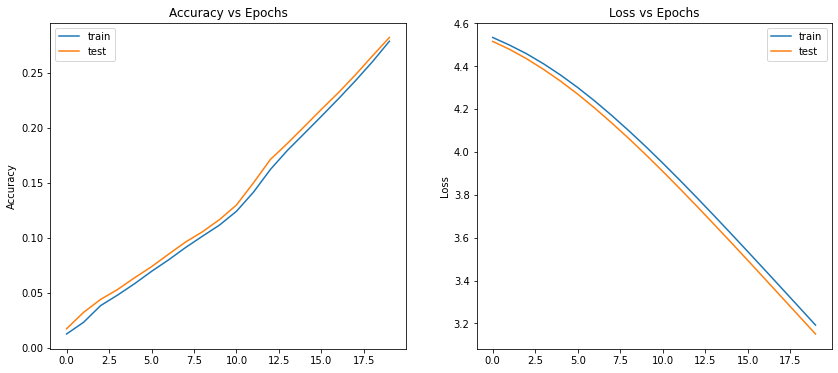

In [28]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


##Part F - Network Architecture

Here, we are changing the baseline network architecture by adding 2 x conv2D layers and 2x MaxPooling layers followed by one flattened layer and 3 x dense layers.

We have the same actication functions, cost functions and gradient estimators as the baseline and we can observe that this new architecture performs slightly better than the baseline by giving an accuracy of 0.9492 and a loss of 0.1423

In [29]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 64)               

In [30]:
#normalizing data for CNN model
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

In [31]:
model_history2=cnn_model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 19s - loss: 0.7548 - accuracy: 0.7938 - val_loss: 0.4151 - val_accuracy: 0.8737 - 19s/epoch - 11ms/step
Epoch 2/20
1714/1714 - 12s - loss: 0.3376 - accuracy: 0.8964 - val_loss: 0.3109 - val_accuracy: 0.9038 - 12s/epoch - 7ms/step
Epoch 3/20
1714/1714 - 14s - loss: 0.2673 - accuracy: 0.9172 - val_loss: 0.2701 - val_accuracy: 0.9169 - 14s/epoch - 8ms/step
Epoch 4/20
1714/1714 - 13s - loss: 0.2335 - accuracy: 0.9267 - val_loss: 0.2684 - val_accuracy: 0.9163 - 13s/epoch - 8ms/step
Epoch 5/20
1714/1714 - 13s - loss: 0.2102 - accuracy: 0.9321 - val_loss: 0.2240 - val_accuracy: 0.9319 - 13s/epoch - 8ms/step
Epoch 6/20
1714/1714 - 13s - loss: 0.1908 - accuracy: 0.9372 - val_loss: 0.2196 - val_accuracy: 0.9322 - 13s/epoch - 8ms/step
Epoch 7/20
1714/1714 - 13s - loss: 0.1767 - accuracy: 0.9412 - val_loss: 0.2196 - val_accuracy: 0.9322 - 13s/epoch - 7ms/step
Epoch 8/20
1714/1714 - 13s - loss: 0.1658 - accuracy: 0.9439 - val_loss: 0.2168 - val_accuracy: 0.9337 - 13s/epoch - 

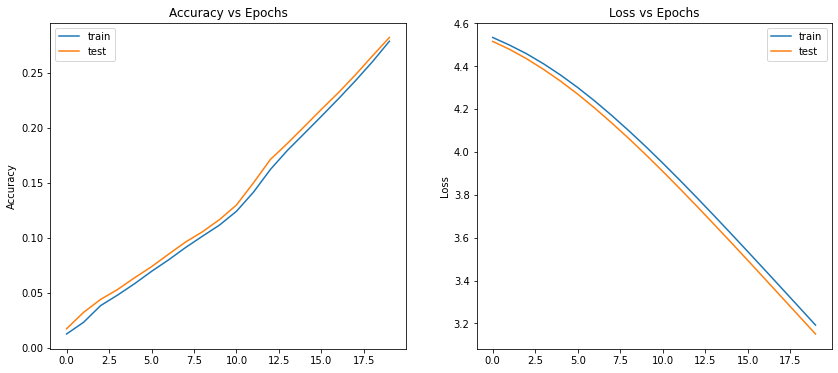

In [32]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


##Part G - Network Initialization



Xavier Initialization keeps the variance the same across every layer. We will assume that our layer’s activations are normally distributed around zero. Sometimes it helps to understand the mathematical justification to grasp the concept, but you can understand the fundamental idea without the math.

In our baseline model, the initializer is glorot uniform. We will be experimenting with Glorot Normal which is also known as Xavier Normal Initializer.



In [19]:
initializer = tf.keras.initializers.GlorotNormal()

In [20]:
#ModelDefinition
model = Sequential()
#model.add(Conv2D(128,(5,5)))
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu',kernel_initializer = initializer))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

Epoch 1/20
1714/1714 - 10s - loss: 0.8059 - accuracy: 0.7875 - val_loss: 0.4888 - val_accuracy: 0.8556 - 10s/epoch - 6ms/step
Epoch 2/20
1714/1714 - 6s - loss: 0.4413 - accuracy: 0.8640 - val_loss: 0.4290 - val_accuracy: 0.8640 - 6s/epoch - 3ms/step
Epoch 3/20
1714/1714 - 6s - loss: 0.3743 - accuracy: 0.8795 - val_loss: 0.3907 - val_accuracy: 0.8798 - 6s/epoch - 3ms/step
Epoch 4/20
1714/1714 - 6s - loss: 0.3284 - accuracy: 0.8918 - val_loss: 0.3566 - val_accuracy: 0.8873 - 6s/epoch - 3ms/step
Epoch 5/20
1714/1714 - 6s - loss: 0.2959 - accuracy: 0.9008 - val_loss: 0.3399 - val_accuracy: 0.8935 - 6s/epoch - 3ms/step
Epoch 6/20
1714/1714 - 6s - loss: 0.2689 - accuracy: 0.9089 - val_loss: 0.3224 - val_accuracy: 0.9015 - 6s/epoch - 3ms/step
Epoch 7/20
1714/1714 - 6s - loss: 0.2475 - accuracy: 0.9149 - val_loss: 0.3318 - val_accuracy: 0.8998 - 6s/epoch - 4ms/step
Epoch 8/20
1714/1714 - 6s - loss: 0.2301 - accuracy: 0.9201 - val_loss: 0.3247 - val_accuracy: 0.8987 - 6s/epoch - 4ms/step
Epoch 

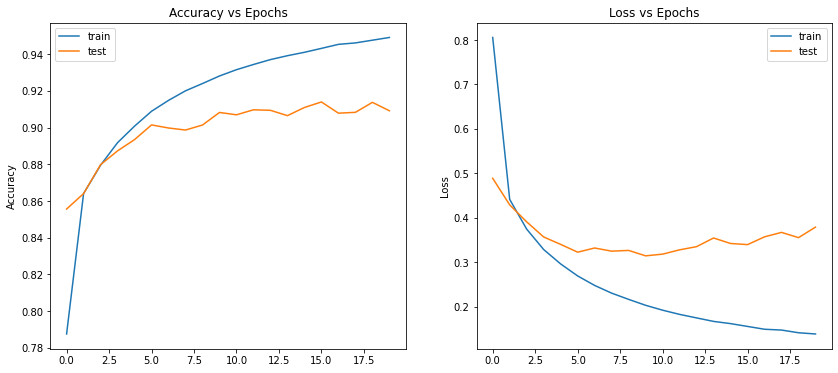

In [22]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()


## References

1. Dataset: https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters

2. CNN Implementation: https://www.kaggle.com/code/nikbearbrown/tmnist-cnn-starter/data?scriptVersionId=98117660

3. CNN Implementation: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

4. CNN Implementation: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

5. Cost Function: https://vitalflux.com/mean-squared-error-vs-cross-entropy-loss-function/#:~:text=Mean%20squared%20error%20(MSE)%20loss%20is%20calculated%20by%20taking%20the,will%20be%20our%20final%20result.

6. CNN Introduction: https://www.analyticsvidhya.com/blog/2022/03/basic-introduction-to-convolutional-neural-network-in-deep-learning/#:~:text=What%20is%20CNN%3F,is%20being%20known%20as%20Convolution.

7. Network Initialization: https://www.deeplearning.ai/ai-notes/initialization/index.html

8. Network Initialization: https://github.com/keras-team/keras/blob/v2.10.0/keras/initializers/initializers_v2.py#L882-L925

9. Optimizers: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=An%20optimizer%20is%20a%20function,loss%20and%20improve%20the%20accuracy.

10. Activation Functions: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


MIT License

Copyright (c) 2022 Poojitha Konduparti

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.